In [2]:
## IMPORTING LIBRARIES
import numpy as np 
import pandas as pd
import os
from PIL import Image, ImageEnhance, ImageChops
import random
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

In [3]:
## DISTRIBUTION OF DATASET IN THE IMAGE FORMATS
import os
from collections import defaultdict
def get_image_format_counts(path):
    # Dictionary to store format counts
    counts = defaultdict(int)

    # All files in the specified path
    for file in os.listdir(path):
        # Check if the file is an image based on its extension
        file_extension = file.split('.')[-1].lower()
        image_extensions = ['jpg', 'jpeg', 'png', 'gif', 'bmp', 'tif']

        if file_extension in image_extensions:
            counts[file_extension] += 1

    return counts

authentic_path = '/kaggle/input/imagedataset2-0/Auth/Auth'
authentic_format_counts = get_image_format_counts(authentic_path)
print("Counts of Image Formats in Authentic Images:")
for format, count in authentic_format_counts.items():
    print(f"{format.upper()}: {count}")

tampered_path = '/kaggle/input/imagedataset2-0/Temp/Temp'
tampered_format_counts = get_image_format_counts(tampered_path)
print("\nCounts of Image Formats in Tampered Images:")
for format, count in tampered_format_counts.items():
    print(f"{format.upper()}: {count}")


Counts of Image Formats in Authentic Images:
JPG: 7437
BMP: 54

Counts of Image Formats in Tampered Images:
JPG: 2574
TIF: 3059
PNG: 360


In [ ]:
## RESIZING THE IMAGES IN THE DATASETS
target_size = (224,224)
resize_images_in_dataset('/users/vmaknika/Desktop/Image Forensics/Auth', '/users/vmaknika/Desktop/Image Forensics/Auth', target_size)

resize_images_in_dataset('/users/vmaknika/Desktop/Image Forensics/Temp', '/users/vmaknika/Desktop/Image Forensics/Temp', target_size)

In [4]:
## RESIZING THE IMAGES IN THE DATASETS
import os
from PIL import Image

def resize_images_in_dataset(input_folder, output_folder, target_size):
    # Ensure the output folder exists, create it if not
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # List all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif'))]

    # Loop through the image files and resize them without cropping
    for image_file in image_files:
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file)

        try:
            # Open the image
            img = Image.open(input_path)

            # Calculate the new size while maintaining the original aspect ratio
            img = img.resize(target_size)

            # Save the resized image
            img.save(output_path)
        except Exception as e:
            print(f"Error resizing {image_file}: {str(e)}")

In [5]:
## SAMPLE AUTHENTIC AND TAMPERED IMAGES
import os
import random
import matplotlib.pyplot as plt
def show_images(path):
    # 20 random image files from the specified path
    image_files = random.sample(os.listdir(path), 20)

    # Subplots with 2 rows and 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(10, 6))

    for i, ax in enumerate(axes.flatten()):
        # Load and plot the image
        image_path = os.path.join(path, image_files[i])
        image = plt.imread(image_path)
        ax.imshow(image)
        ax.set_title(image_files[i][:10])
        ax.axis('off')

    # Adjust spacing
    plt.tight_layout()
    
    plt.show()


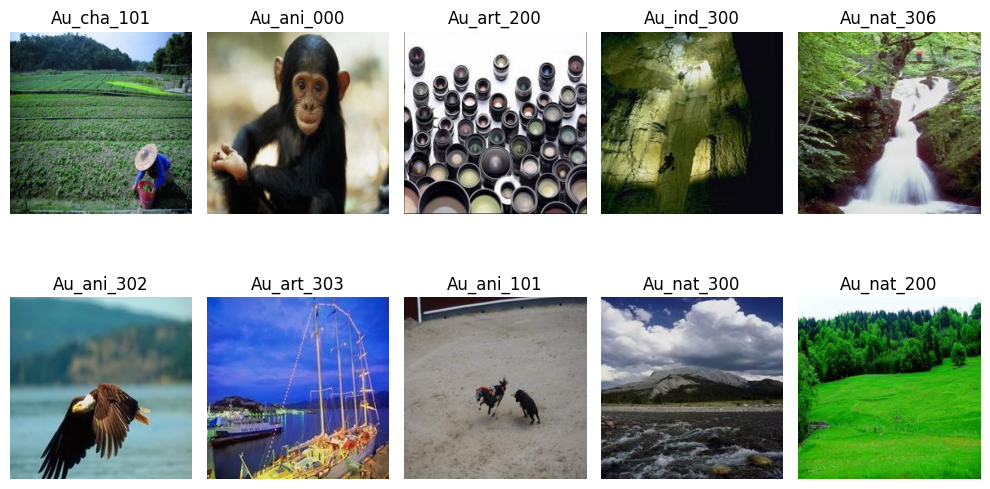

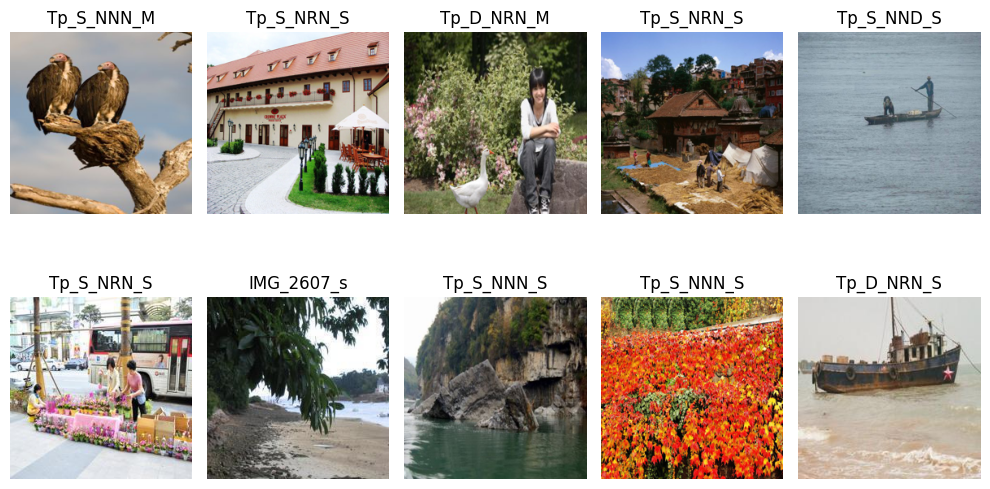

In [6]:
## SAMPLE AUTHENTIC AND TAMPERED IMAGES
#Path to the Authentic Images
image_dir = '/kaggle/input/imagedataset2-0/Auth/Auth'
show_images(image_dir)
# Path to the Tampered images directory
image_dir = '/kaggle/input/imagedataset2-0/Temp/Temp'
show_images(image_dir)

In [7]:
## CREATING ELA IMAGES FROM THE AUTHENTIC AND TEMPERED IMAGES 
def image_to_ela(path, quality, resave_path):
    try:
        # Check file format
        if path.endswith('jpg') or path.endswith('jpeg') or path.endswith('png') or path.endswith('tif'):
            # Open and convert to RGB mode
            image = Image.open(path).convert('RGB')
            
            # Resave image
            image.save('resaved.jpg', 'JPEG', quality=quality)
            resaved = Image.open('resaved.jpg')

            # Calculate ELA 
            ela_image = ImageChops.difference(image, resaved)

            # Minimum, maximum pixel values in the ELA image
            band_values = ela_image.getextrema()
            max_value = max([val[1] for val in band_values])
            
            if max_value == 0:
                max_value = 1

            # Scale pixel values to range [0, 255]
            scale = 255.0 / max_value
            ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

            # Save the ELA image
            ela_image.save(os.path.join(resave_path, os.path.basename(path)), 'JPEG')
    except Exception as e:
        print(f'Could not convert {path} to ELA: {str(e)}')

In [8]:
## CREATING ELA IMAGES FROM THE AUTHENTIC AND TEMPERED IMAGES
def preprocess_data(parent_path, files, resave_path):
    for file in files:
        image_to_ela(os.path.join(parent_path, file), 90, resave_path)

In [9]:
## CREATING ELA IMAGES FROM THE AUTHENTIC AND TEMPERED IMAGES
#Process Authentic Files
auth_files = os.listdir('/kaggle/input/imagedataset2-0/Auth/Auth')
parent_path = '/kaggle/input/imagedataset2-0/Auth/Auth'
#preprocess_data(parent_path, auth_files, '/users/vmaknika/Desktop/Image Forensics 2.0/all_reals')

#Process Tampered Files
doc_files = os.listdir('/kaggle/input/imagedataset2-0/Temp/Temp')
parent_path = '/kaggle/input/imagedataset2-0/Temp/Temp'
#preprocess_data(parent_path, doc_files, '/users/vmaknika/Desktop/Image Forensics 2.0/all_dup')

#Display and Count
real_count = len(os.listdir('/kaggle/input/imagedataset2-0/all_reals/all_reals'))
doc_count = len(os.listdir('/kaggle/input/imagedataset2-0/all_dup/all_dup'))
print('There are ' + str(real_count) + ' supported Authentic Images')
print('There are ' + str(doc_count) + ' supported Tempered Images')


There are 7437 supported Authentic Images
There are 5993 supported Tempered Images


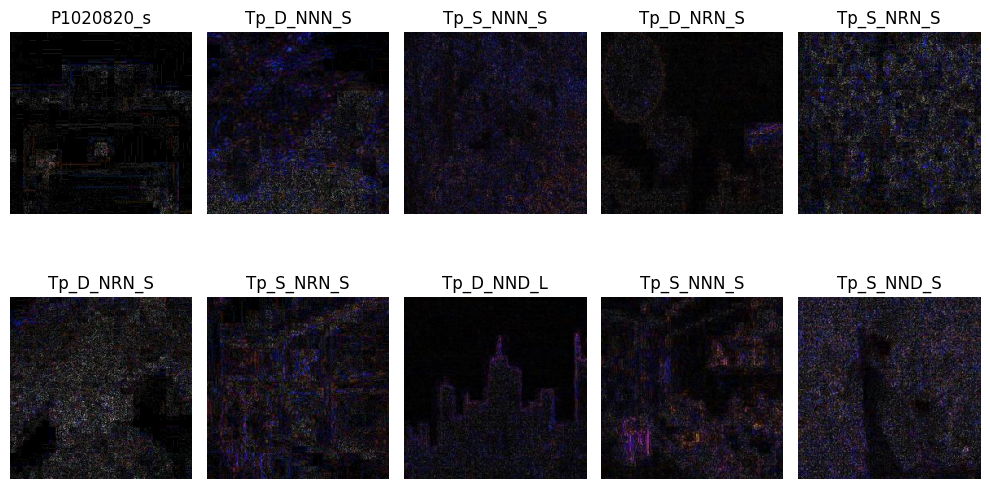

In [10]:
## OVERVIEW OF THE ELA IMAGES 
image_dir = '/kaggle/input/imagedataset2-0/all_dup/all_dup'
show_images(image_dir)

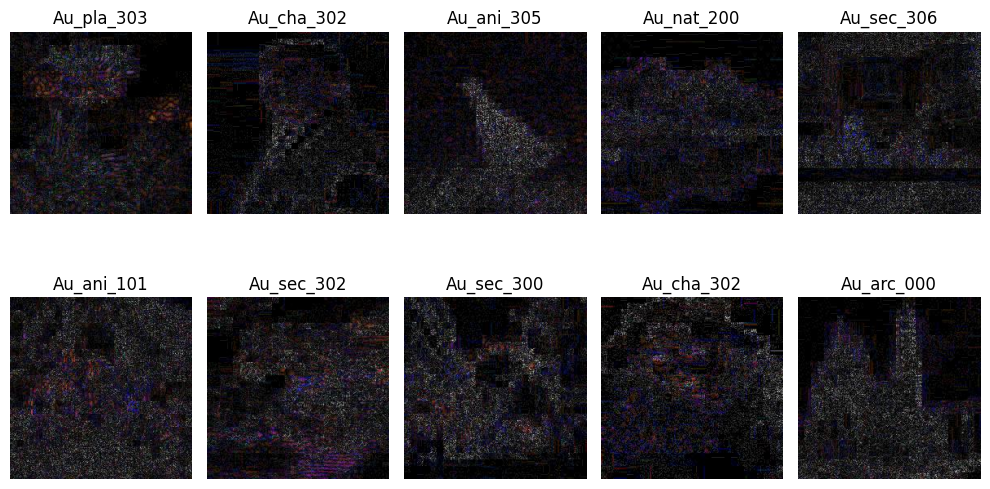

In [11]:
## OVERVIEW OF THE ELA IMAGES
image_dir = '/kaggle/input/imagedataset2-0/all_reals/all_reals'
show_images(image_dir)

In [ ]:
## DO NOT EXECUTE ##
import os

# Define the image directory and output directory
image_dir = '/kaggle/input/imagedataset2-0//ela_images'
output_dir = 'path/to/your/output/directory'

# List of images in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Input label
label = input("Enter a label for all images: ")

# Initialize variables to store labels
labels = {}

# Assign the same label to all images
for image_file in image_files:
    labels[image_file] = label

# Save labels to a text file
labels_path = os.path.join(output_dir, 'labels.txt')
with open(labels_path, 'w') as file:
    for image_file, label in labels.items():
        file.write(f"{image_file}: {label}\n")

print(f"All images labeled as '{label}'. Labels saved to 'labels.txt'.")


In [ ]:
## DO NOT EXECUTE ##
import cv2
import os

# Define the paths to your two image datasets
dataset1_path = '/users/vmaknika/Desktop/Image Forensics 2.0/all_reals'
dataset2_path = '/users/vmaknika/Desktop/Image Forensics 2.0/all_dup'

# Define the path for the combined dataset
combined_dataset_path = '/users/vmaknika/Desktop/Image Forensics 2.0/ela_images'

# Create the directory for the combined dataset if it doesn't exist
if not os.path.exists(combined_dataset_path):
    os.makedirs(combined_dataset_path)

# Function to load and save images from one dataset to another
def combine_datasets(src_path, dest_path):
    for filename in os.listdir(src_path):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif') or filename.endswith('.jpeg'):
            image = cv2.imread(os.path.join(src_path, filename))
            # Perform any image processing or resizing if needed
            # Save the image to the combined dataset directory
            cv2.imwrite(os.path.join(dest_path, filename), image)

# Combine the two datasets
combine_datasets(dataset1_path, combined_dataset_path)
combine_datasets(dataset2_path, combined_dataset_path)

print("Combined dataset saved to:", combined_dataset_path)


In [ ]:
## DO NOT EXECUTE ##
import pandas as pd

# Load the first CSV dataset
df1 = pd.read_csv('/users/vmaknika/Desktop/Image Forensics 2.0/Auth.csv')

# Load the second CSV dataset
df2 = pd.read_csv('/users/vmaknika/Desktop/Image Forensics 2.0/Temp.csv')

# Concatenate the two datasets vertically (stack them on top of each other)
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset to a third CSV file
combined_df.to_csv('combined_dataset.csv', index=False)


In [ ]:
## Do not Execute ##
import os
import cv2
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Set the path to your dataset
dataset_path = '/kaggle/input/imagedataset2-0/Dataset/Dataset'
output_dir = '/kaggle/input/imagedataset2-0/splitted_data/splitted_data'
n_splits = 5  # Number of folds for Stratified K-Fold

# Create output directory
os.makedirs(output_dir, exist_ok=True)

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Load image paths and labels
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_file in os.listdir(label_path):
            if image_file.endswith('.jpg'):
                image_paths.append(os.path.join(label_path, image_file))
                labels.append(label)

# Convert labels to numerical values (0 for 'Tampered', 1 for 'Authentic')
labels = np.array([0 if label == 'Tampered' else 1 for label in labels])

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create train and validation directories for each fold
for fold, (train_index, val_index) in enumerate(skf.split(image_paths, labels), 1):
    train_dir = os.path.join(output_dir, f'fold_{fold}', 'train')
    val_dir = os.path.join(output_dir, f'fold_{fold}', 'val')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Split image paths into train and val sets
    train_paths = np.array(image_paths)[train_index]
    val_paths = np.array(image_paths)[val_index]

    # Copy images to train and val directories
    for path in train_paths:
        image = cv2.imread(path)
        image_file = os.path.basename(path)
        train_image_path = os.path.join(train_dir, image_file)
        cv2.imwrite(train_image_path, image)

    for path in val_paths:
        image = cv2.imread(path)
        image_file = os.path.basename(path)
        val_image_path = os.path.join(val_dir, image_file)
        cv2.imwrite(val_image_path, image)

print("Data splitting and folder creation completed.")


In [ ]:
!pip install keras-tuner

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from kerastuner.tuners import RandomSearch

# Define constants
input_shape = (150, 150, 3)  # Adjust the input shape as needed
batch_size = 32
n_splits = 3  # Number of Stratified K-Fold splits

# Define the path to the directory containing your 5-fold dataset splits
dataset_splits_dir = '/kaggle/input/imagedataset2-0/splitted_data/splitted_data'  # Replace with the actual directory path

# Initialize lists to store fold accuracies and losses
fold_accuracies = []
fold_losses = []

# Initialize a K-Fold cross-validator
skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

# Function to build the model
def build_model(hp):
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Define optimizer with learning rate from hyperparameters
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Loop over each fold
for fold, (train_indices, val_indices) in enumerate(skf.split(np.zeros(n_splits), np.zeros(n_splits)), start=1):
    print(f"Fold {fold}/{n_splits}")

    # Create data generators for training and validation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    # Load training and validation data manually based on fold indices
    train_images = []
    train_labels = []
    val_images = []
    val_labels = []

    # Load training data
    for idx in train_indices:
        fold_dir = os.path.join(dataset_splits_dir, f'fold{idx + 1}')
        train_dir1 = os.path.join(fold_dir, 'train', 'class1')
        train_dir2 = os.path.join(fold_dir, 'train', 'class2')

        # Load images from class1 and class2 train directories
        for image_file in os.listdir(train_dir1):
            image_path = os.path.join(train_dir1, image_file)
            if os.path.exists(image_path):
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape)
                image = tf.keras.preprocessing.image.img_to_array(image)
                train_images.append(image)
                train_labels.append(0)  # Class 0 for class1

        for image_file in os.listdir(train_dir2):
            image_path = os.path.join(train_dir2, image_file)
            if os.path.exists(image_path):
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape)
                image = tf.keras.preprocessing.image.img_to_array(image)
                train_images.append(image)
                train_labels.append(1)  # Class 1 for class2

    # Load validation data
    for idx in val_indices:
        fold_dir = os.path.join(dataset_splits_dir, f'fold{idx + 1}')
        val_dir1 = os.path.join(fold_dir, 'val', 'class1')
        val_dir2 = os.path.join(fold_dir, 'val', 'class2')

        # Load images from class1 and class2 val directories
        for image_file in os.listdir(val_dir1):
            image_path = os.path.join(val_dir1, image_file)
            if os.path.exists(image_path):
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape)
                image = tf.keras.preprocessing.image.img_to_array(image)
                val_images.append(image)
                val_labels.append(0)  # Class 0 for class1

        for image_file in os.listdir(val_dir2):
            image_path = os.path.join(val_dir2, image_file)
            if os.path.exists(image_path):
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=input_shape)
                image = tf.keras.preprocessing.image.img_to_array(image)
                val_images.append(image)
                val_labels.append(1)  # Class 1 for class2

    # Convert lists to NumPy arrays
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    val_images = np.array(val_images)
    val_labels = np.array(val_labels)

    # Create a Hyperband tuner
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=5,  # Adjust the number of trials as needed
        directory='my_directory',  # Replace with your desired directory
        project_name='my_project'
    )

    # Search for the best hyperparameters
    tuner.search(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

    # Get the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Build the model with the best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # Add callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(
        train_images,
        train_labels,
        batch_size=batch_size,
        epochs=15,  # Adjust the number of epochs as needed
        verbose=1,
        validation_data=(val_images, val_labels),
        callbacks=[reduce_lr, early_stopping]
    )

    # Append fold accuracy and loss to the lists
    fold_accuracies.append(history.history['accuracy'][-1])
    fold_losses.append(history.history['loss'][-1])

    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Calculate and print mean accuracy and loss over all folds
mean_accuracy = np.mean(fold_accuracies)
mean_loss = np.mean(fold_losses)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Loss: {mean_loss}")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_4358/3987395840.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Fold 1/3

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
0.0020854         |0.00010732        |learning_rate

Epoch 1/10


2023-10-11 08:40:10.135855: E tensorflow/compiler/xla/service/slow_operation_alarm.cc:65] 
********************************
[Compiling module a_inference__update_step_xla_43093__.56] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-10-11 08:43:19.264283: E tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 5m9.163362587s

********************************
[Compiling module a_inference__update_step_xla_43093__.56] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2023-10-11 08:49:32.316189: E tensorflow/compiler/xla/service/slow_operation_alarm.cc:133] The operation took 2m10.139612345s

********************************
[Compiling module a_inference__update_step_xla_42999__.56] Very slow compile?  If you want to file a bug, run with envvar XLA_FLAGS=-